# **Random Forest**




## 1. Load and Prepare Datasets

Importing Packages

In [26]:
# Import packages
import pandas as pd
import numpy as np
import altair as alt
import matplotlib as plt
from sklearn.metrics import recall_score, f1_score,roc_auc_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

## Importing Datasets

Importing the preprocessed and presplit datasets from the first experiment

In [27]:
#Importing the datasets
X_train = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/train_data.csv')
X_dev = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/dev_data.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/test_data.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_train.csv')
y_dev = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_dev.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_test.csv')

In [28]:
#Checking the shapes of the datasets

print("The size of X_train is:",X_train.shape)
print("The size of X_dev is:",X_dev.shape)
print("The size of X_test is:",X_test.shape)
print("The size of y_train is:",y_train.shape)
print("The size of y_dev is:", y_dev.shape)
print("The size of y_test is:",y_test.shape)

The size of X_train is: (82310, 36)
The size of X_dev is: (20578, 36)
The size of X_test is: (25723, 36)
The size of y_train is: (82310, 1)
The size of y_dev is: (20578, 1)
The size of y_test is: (25723, 1)


In [29]:
#Distribution of the target values in the train dataset
y_train.value_counts()

Target
0         80056
1          2254
dtype: int64

In [30]:
#Distribution of the target values in the dev dataset
y_dev.value_counts()

Target
0         20015
1           563
dtype: int64

In [31]:
#Distribution of the target values in the test dataset
y_test.value_counts()

Target
0         25019
1           704
dtype: int64

## Modeling

### Assesing Baseline Model

In [32]:
# Creating a database filled with 1
y_base = np.full(y_train.shape, 1)

# Calculating the precision score
print("The Precision Score of this model is:",precision_score(y_train, y_base))

# Calculating the accuracy score
print("The Accuracy Score of this model is:",accuracy_score(y_train, y_base))


The Precision Score of this model is: 0.027384278945450126
The Accuracy Score of this model is: 0.027384278945450126


### Train Random Forest Classifier

In [33]:
#Initiating a Random Forest classifier
rf= RandomForestClassifier(random_state=42,n_estimators=100,max_depth=15,min_samples_leaf=10,max_features=None)

#Fitting the data in it
rf.fit(X_train, y_train)

#Making Predictions
y_train_preds = rf.predict(X_train)

#Checking the recall scores
print("The Recall Score of this model is:",recall_score(y_train, y_train_preds))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_train, y_train_preds))

#Checking the Confusion Matrix
confusion_matrix(y_train, y_train_preds)


<ipython-input-33-e261ab5c88fc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


The Recall Score of this model is: 0.7848269742679681
The f1 Score of this model is: 0.8564512224642944


array([[79948,   108],
       [  485,  1769]])

In [34]:
np.mean([estimator.tree_.max_depth for estimator in rf.estimators_])

15.0

Predicting Dev data

In [35]:
#Making Predictions
y_dev_preds = rf.predict(X_dev)

#Checking the recall scores
print("The Recall Score of this model is:",recall_score(y_dev, y_dev_preds))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_dev, y_dev_preds))

#Checking the Confusion Matrix
confusion_matrix(y_dev, y_dev_preds)

The Recall Score of this model is: 0.7335701598579041
The f1 Score of this model is: 0.8113948919449903


array([[19973,    42],
       [  150,   413]])

Test Dataset

In [36]:
#Making Predictions
y_test_preds = rf.predict(X_test)

#Checking the recall scores
print("The Recall Score of this model is:",recall_score(y_test, y_test_preds))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_test, y_test_preds))

#Checking the Confusion Matrix
confusion_matrix(y_test, y_test_preds)

The Recall Score of this model is: 0.7315340909090909
The f1 Score of this model is: 0.8129439621152328


array([[24971,    48],
       [  189,   515]])

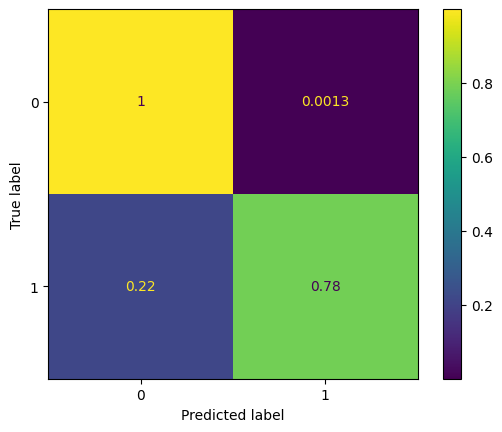

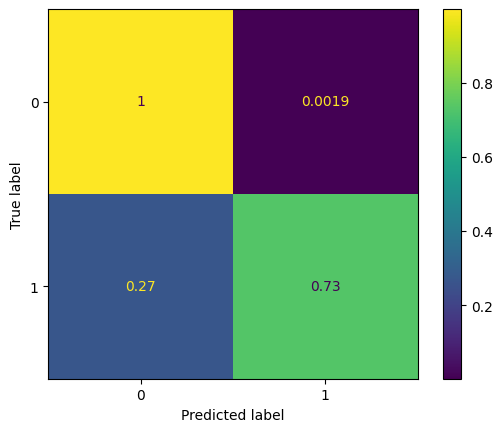

In [37]:
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize='true')

## Feature Importance

In [ ]:
#creating a dataframe containing the feature importances
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_train.columns,
     'feature_importance': rf.feature_importances_
     }
)
#displaying the feature importance 
feat_imp_rf_df


In [53]:
#plotting feature importance
feature_chart = alt.Chart(feat_imp_rf_df).mark_bar().encode(
     x='feature',
     y='feature_importance'
  )
feature_chart

alt.Chart(...)